In [1]:
#importing libraries
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import colors as mcolors 
import math 
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

In [2]:
#reading user-rating data file 
movies_rating = pd.read_csv('./data/u.data', sep='\t')

movies_rating.head()

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
#getting average rating of each movie
avgRatingsMovies = movies_rating.groupby('movieid').mean()
avgRatingsMovies.drop(['userid','timestamp'], axis=1, inplace=True)
avgRatingsMovies.head()

,rating
movieid,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


[Text(0, 0.5, 'Avg. Rating'),
 Text(0.5, 0, 'Movies ID'),
 Text(0.5, 1.0, 'All Movies Average Rating')]

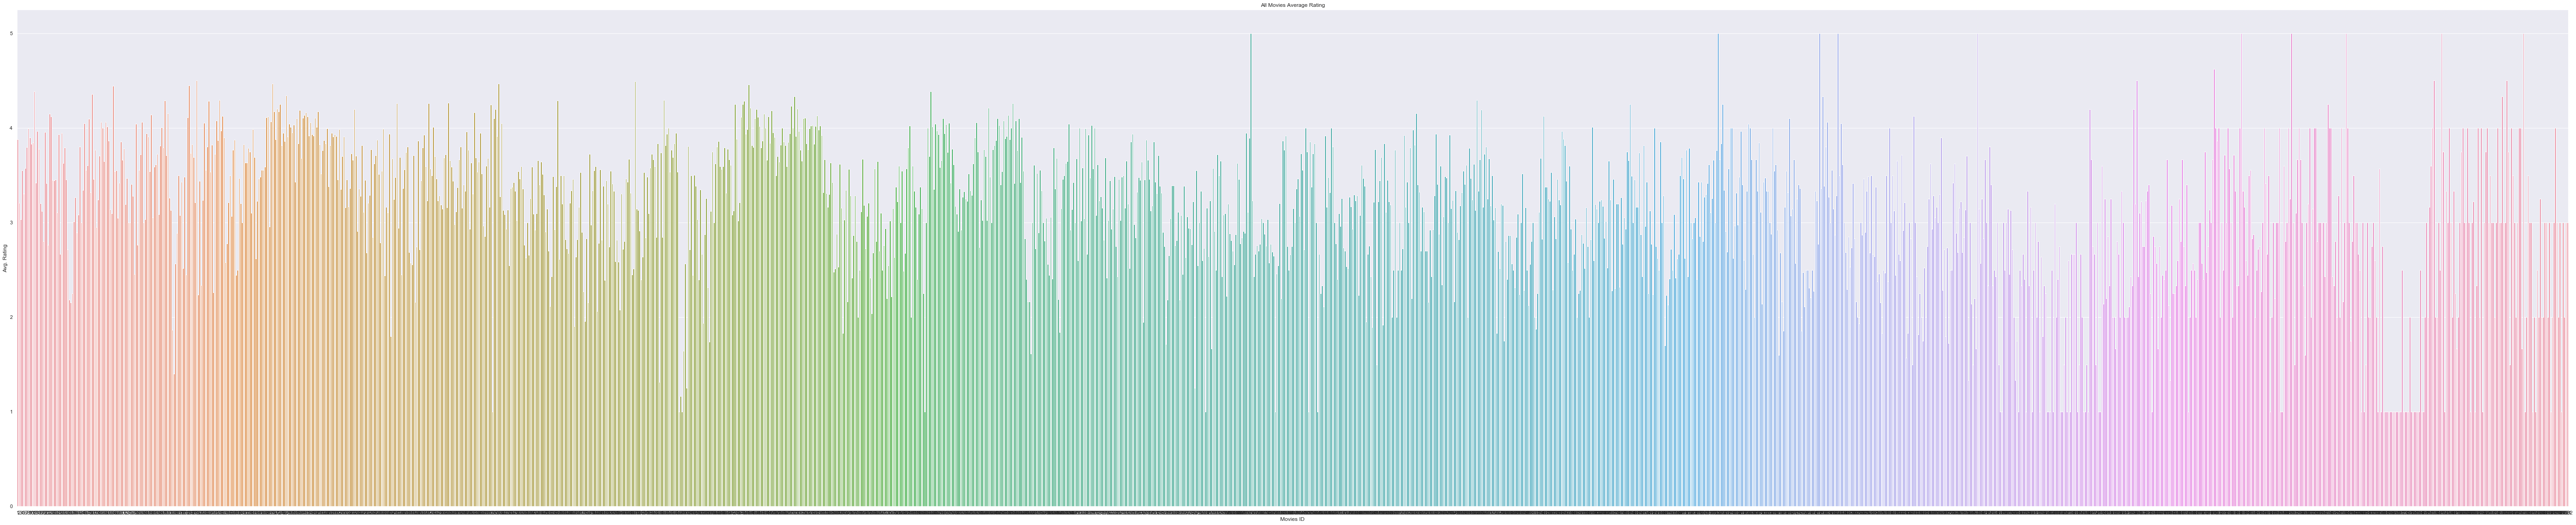

In [4]:
#plotting graph of each movie rating
sns.set(rc={'figure.figsize':(100,20)})
ax = sns.barplot(x=avgRatingsMovies.index, y=avgRatingsMovies.rating)
ax.set(xlabel='Movies ID', ylabel='Avg. Rating', title='All Movies Average Rating')

In [5]:
#reading movies data file 
movies =[]
with open('./data/u.item', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='|')
    for row in reader:
        movies.append(row)
        
movies_df = pd.DataFrame(movies,columns =['movie id','movietitle','releasedate','videoreleasedate','IMDbURL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western'])

movies_df.head()

,movie id,movietitle,releasedate,videoreleasedate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Movies List by Genre from 1922 - 1998')]

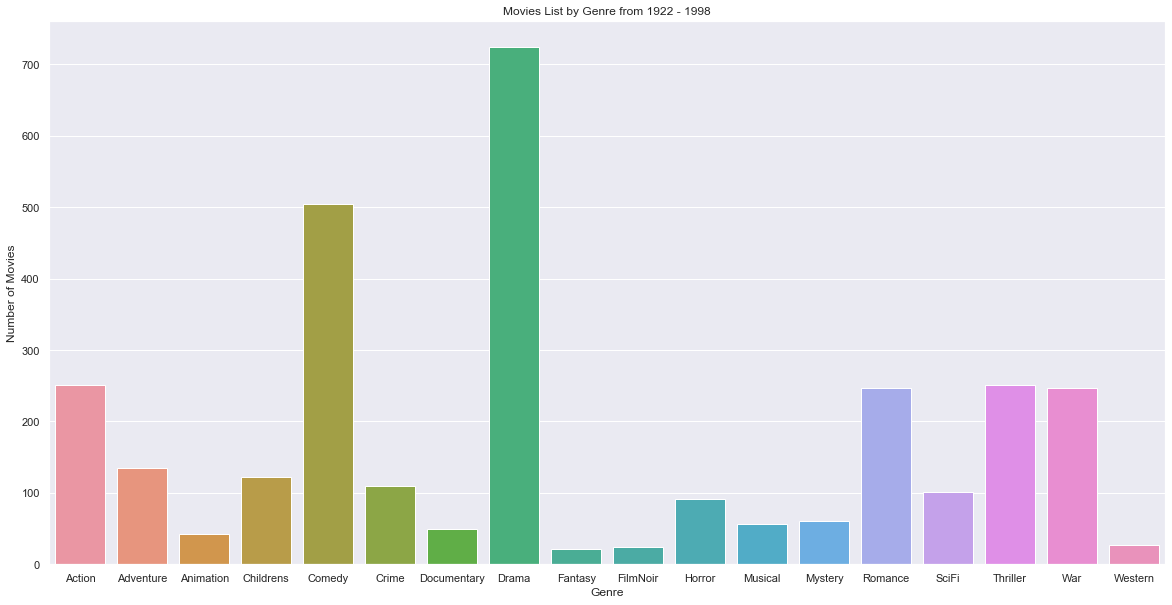

In [6]:
#converting releasedate column into date-time format
movies_df['releasedate']= pd.to_datetime(movies_df['releasedate'])

#converting below columns into type int
movies_df = movies_df.astype({'Action':int,'Adventure':int,'Animation':int,'Childrens':int,'Comedy':int,'Crime':int,'Documentary':int,'Drama':int,'Fantasy':int,'FilmNoir':int,'Horror':int,'Musical':int,'Mystery':int,'Romance':int,'SciFi':int,'Thriller':int,'War':int,'Western':int})

#getting sum of movie by genre
Action = sum(movies_df['Action'])
Adventure = sum(movies_df['Adventure'])
Animation = sum(movies_df['Animation'])
Childrens = sum(movies_df['Childrens'])
Comedy = sum(movies_df['Comedy'])
Crime = sum(movies_df['Crime'])
Documentary = sum(movies_df['Documentary'])
Drama = sum(movies_df['Drama'])
Fantasy = sum(movies_df['Fantasy'])
FilmNoir = sum(movies_df['FilmNoir'])
Horror = sum(movies_df['Horror'])
Musical = sum(movies_df['Musical'])
Mystery = sum(movies_df['Mystery'])
Romance = sum(movies_df['Romance'])
SciFi = sum(movies_df['SciFi'])
Thriller = sum(movies_df['Thriller'])
War = sum(movies_df['Romance'])
Western = sum(movies_df['Western'])

genre = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
categoryNumber = [Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western]

#plotting graph by genre
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x=genre, y=categoryNumber)
ax.set(ylabel='Number of Movies', xlabel='Genre', title='Movies List by Genre from 1922 - 1998')

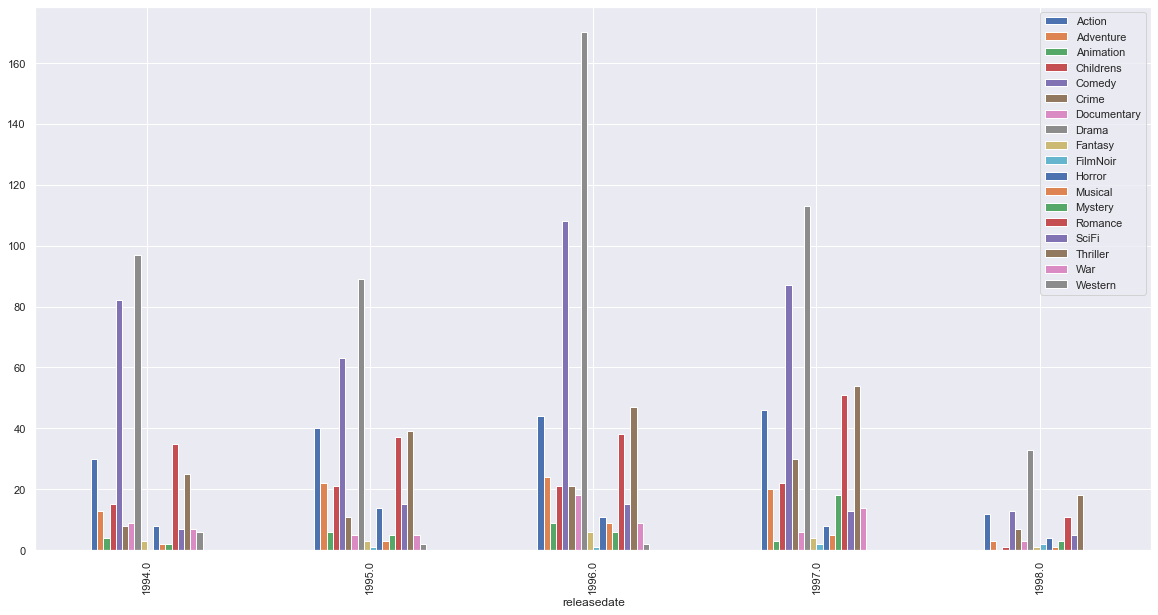

In [7]:
#converting release date into year
movies_df['releasedate']= movies_df['releasedate'].dt.year
#group by year and sum of all movies by year
movies_df = movies_df.groupby(['releasedate'])[genre].sum()

#getting movies between 1990 and 1998
movies_1990s = movies_df[(movies_df.index >= 1994) & (movies_df.index <= 1998) ]
movies_1990s.plot(kind="bar")

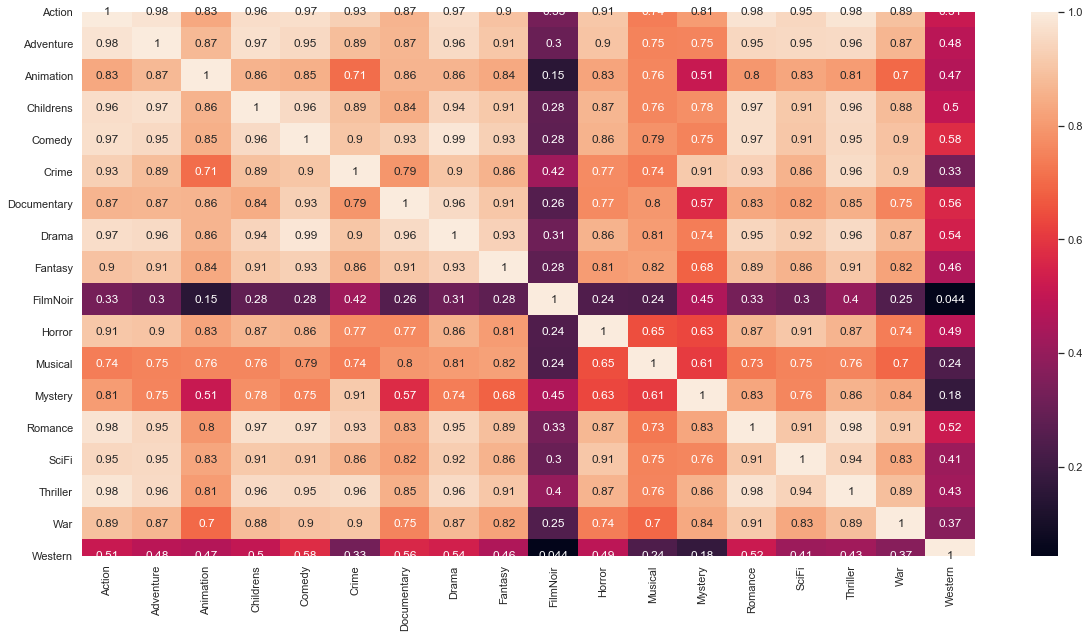

In [8]:
#plotting heatmap
sns.heatmap(movies_df.corr(), annot = True) 

,x,y
releasedate,,
1922.0,1922.0,0
1926.0,1926.0,1
1930.0,1930.0,1
1931.0,1931.0,0
1932.0,1932.0,0
...,...,...
1994.0,1994.0,97
1995.0,1995.0,89
1996.0,1996.0,170


array([[1.94372727e+03, 1.48484848e+00],
       [1.97715152e+03, 4.33333333e+00],
       [1.99500000e+03, 1.06600000e+02]])

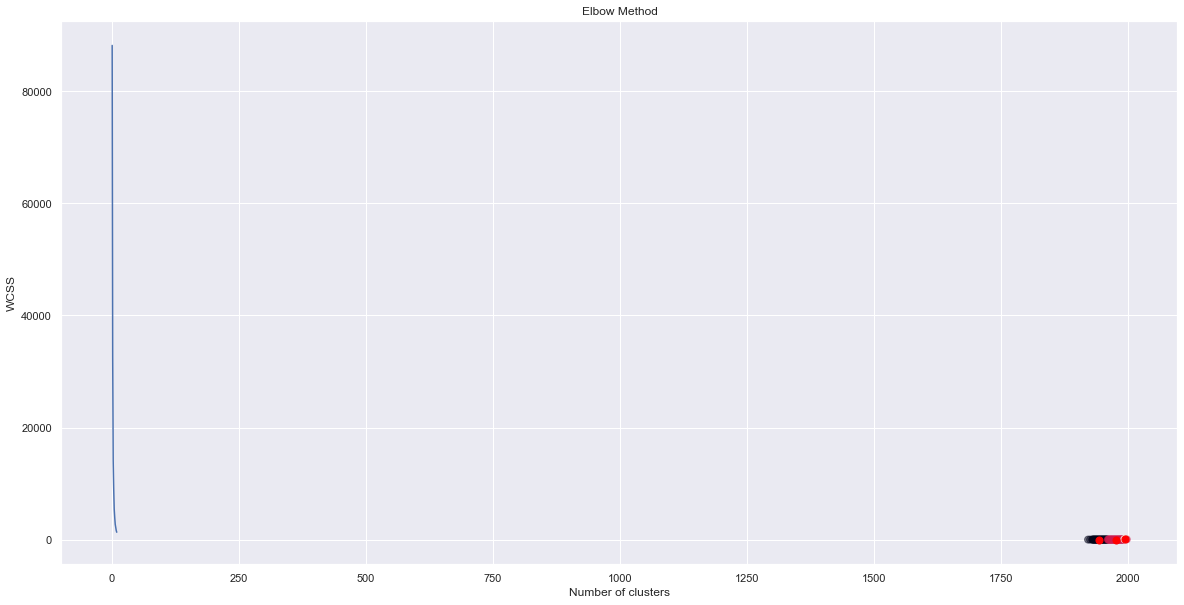

In [9]:
#clustering with Elbow Method

#taking two-dimensional data i.e. year and Drama movie(because No. of drama movie is more)
Data = {'x': movies_df.index,
        'y':  movies_df.Drama}

df = pd.DataFrame(Data,columns=['x','y'])

display(df)
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
display(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


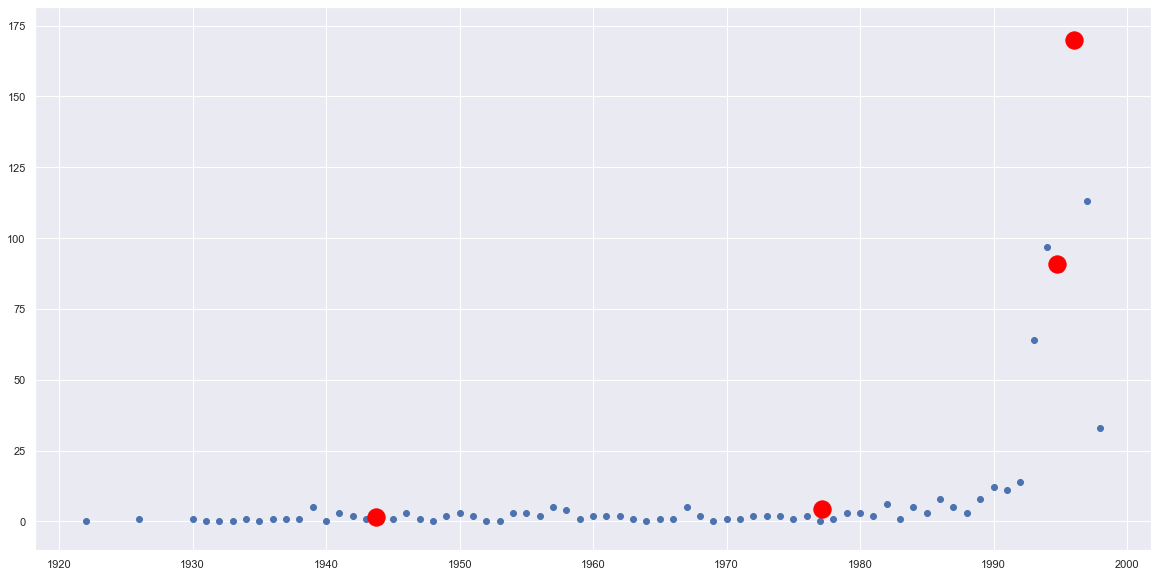

In [10]:
#k-mean
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['x'], df['y'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

array([16, 16, 16, 16, 16, 16,  9,  9, 16,  9,  0, 10,  9, 15,  0,  0, 15,
       15, 15, 16, 16, 15, 15, 15,  9,  9, 17, 15,  0, 10, 17,  9, 15, 15,
       15,  0,  9,  9, 16, 10, 15,  0,  0,  0,  0,  0,  9,  0, 16,  9,  9,
       17, 17, 12, 17, 16, 17, 17,  8, 13, 17,  8,  6, 14, 11,  5,  1,  7,
        2,  4,  3])

           0         1         2
0 -14.337494 -0.303122  0.077234
1 -13.674938 -0.846332 -0.315926
2 -13.674938 -0.846332 -0.315926
3 -14.035850  0.386034 -0.586684
4 -14.113511  0.181822  0.434203


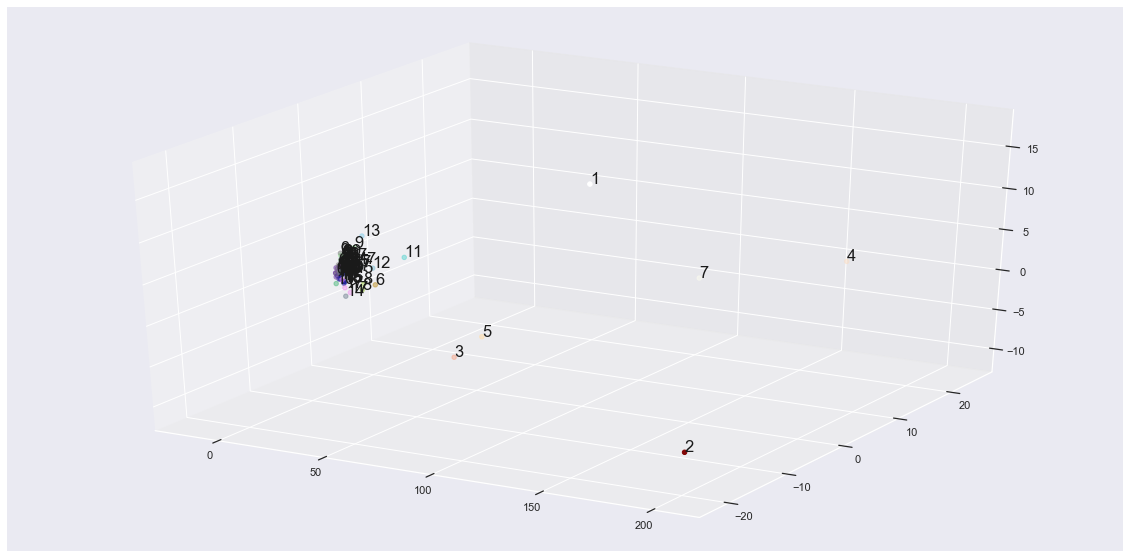

In [11]:
'''
Multidimensional dimensional data
'''
clusters = 18
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(movies_df) 
  
display(kmeans.labels_)
pca = PCA(3) 
pca.fit(movies_df) 
  
pca_data = pd.DataFrame(pca.transform(movies_df)) 
  
print(pca_data.head())

   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

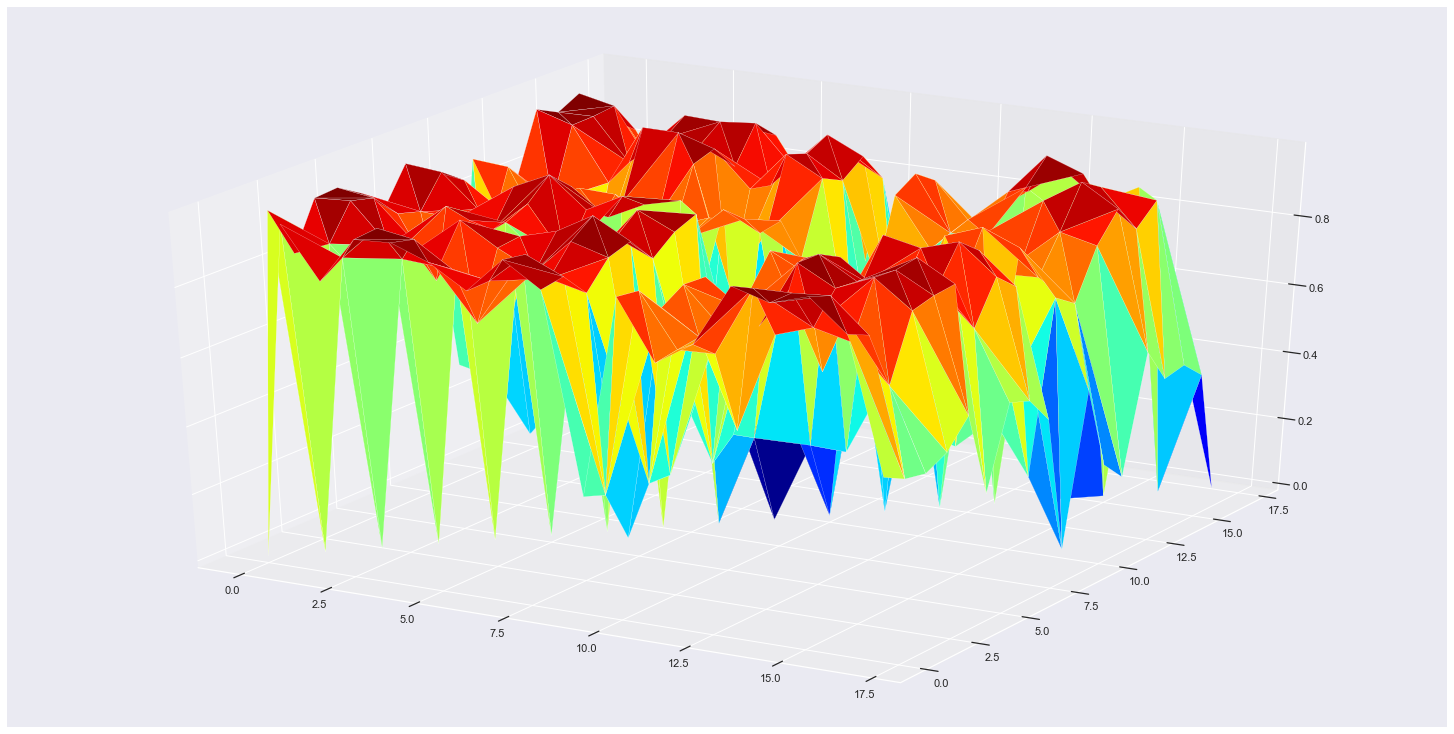

In [12]:
# generating correlation data 
df = movies_df.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 